In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Creación del CSV

In [ ]:
import os
import csv

carpeta_raiz = "/content/drive/MyDrive/Tesis/mono_audios"

def obtener_label(nombre_archivo):
    nombre_sin_extension = os.path.splitext(nombre_archivo)[0]
    label = ''.join(filter(str.isalpha, nombre_sin_extension))
    return label

filas_csv = []

for root, _, archivos in os.walk(carpeta_raiz):
    for archivo in archivos:
        if archivo.endswith(".wav"):
            path = os.path.join(root, archivo)
            label = obtener_label(archivo)
            filas_csv.append([path, label])

archivo_csv_salida = "/content/drive/MyDrive/Tesis/violence.csv"

with open(archivo_csv_salida, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["path", "label"])
    writer.writerows(filas_csv)

print(f"Se ha creado el archivo CSV '{archivo_csv_salida}' con éxito en Google Drive.")


Se ha creado el archivo CSV '/content/drive/MyDrive/Tesis/violence.csv' con éxito en Google Drive.


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/Tesis/violence.csv'

Dataframe del set de datos

In [ ]:
import pandas as pd
from pathlib import Path

df = pd.read_csv(DATASET_PATH)
df.head()

,path,label
0,/content/drive/MyDrive/Tesis/mono_audios/screa...,screams
1,/content/drive/MyDrive/Tesis/mono_audios/screa...,screams
2,/content/drive/MyDrive/Tesis/mono_audios/screa...,screams
3,/content/drive/MyDrive/Tesis/mono_audios/screa...,screams
4,/content/drive/MyDrive/Tesis/mono_audios/screa...,screams


Etiquetas del set de datos

In [ ]:
valores_unicos = df['label'].unique()

print(valores_unicos)

['screams' 'peopletalking' 'crying' 'gunshot' 'glassbreaking']


In [ ]:
import pandas as pd

mapeo_etiquetas = {'gunshot': 1, 'screams': 2, 'glassbreaking': 3, 'crying': 4, 'people_talking': 5}
df['classID'] = df['label'].map(mapeo_etiquetas)

data = df.drop('label', axis=1)
data.to_csv('data.csv', index=False)
data.head()

,path,classID
0,/content/drive/MyDrive/Tesis/mono_audios/screa...,2.0
1,/content/drive/MyDrive/Tesis/mono_audios/screa...,2.0
2,/content/drive/MyDrive/Tesis/mono_audios/screa...,2.0
3,/content/drive/MyDrive/Tesis/mono_audios/screa...,2.0
4,/content/drive/MyDrive/Tesis/mono_audios/screa...,2.0


# Exploración de datos

In [ ]:
import random

ran = int(random.uniform(0, 1245))
random_audio_path = data['path'][ran]
print(random_audio_path)

/content/drive/MyDrive/Tesis/mono_audios/screams/screams142.wav


In [ ]:
from IPython.display import Audio, display

display(Audio(random_audio_path, autoplay=True))

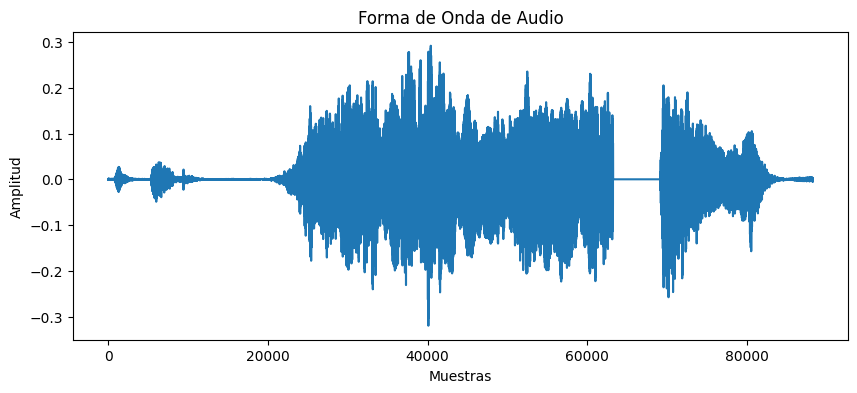

In [ ]:
import torchaudio
import matplotlib.pyplot as plt


forma_onda, frecuencia_muestreo = torchaudio.load(random_audio_path)

# Graficar la forma de onda
plt.figure(figsize=(10, 4))
plt.plot(forma_onda.t().numpy())
plt.title('Forma de Onda de Audio')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


In [ ]:
import tensorflow as tf

# Modelo

In [ ]:
!pip install librosa numpy scikit-learn keras

In [ ]:
import os
import librosa
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/Tesis/mono_audios'
features = []
labels = []

target_sampling_rate = 16000
target_duration = 2

for subfolder in os.listdir(data_dir):
    subfolder_path = os.path.join(data_dir, subfolder)

    if os.path.isdir(subfolder_path):
        label = subfolder

        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)
            if file_path.endswith('.wav'):

                audio, _ = librosa.load(file_path, sr=target_sampling_rate, duration=target_duration)
                spectrogram = librosa.feature.melspectrogram(y=audio, sr=target_sampling_rate)
                features.append(spectrogram)
                labels.append(label)


In [ ]:
len(features)

1245

In [ ]:
len(labels)

1245

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Codifica las etiquetas como números
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convierte las etiquetas en codificación one-hot
labels = to_categorical(labels)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)

In [ ]:
# Obtén el número de ejemplos por clase en el conjunto de entrenamiento
num_ejemplos_por_clase_train = np.sum(y_train, axis=0)
print("Número de ejemplos por clase en el conjunto de entrenamiento:")
print(num_ejemplos_por_clase_train)

# Obtén el número de ejemplos por clase en el conjunto de validación
num_ejemplos_por_clase_val = np.sum(y_val, axis=0)
print("\nNúmero de ejemplos por clase en el conjunto de validación:")
print(num_ejemplos_por_clase_val)

# Obtén el número de ejemplos por clase en el conjunto de prueba
num_ejemplos_por_clase_test = np.sum(y_test, axis=0)
print("\nNúmero de ejemplos por clase en el conjunto de prueba:")
print(num_ejemplos_por_clase_test)


Número de ejemplos por clase en el conjunto de entrenamiento:
[199. 199. 199. 200. 199.]

Número de ejemplos por clase en el conjunto de validación:
[30. 30. 30. 29. 30.]

Número de ejemplos por clase en el conjunto de prueba:
[20. 20. 20. 20. 20.]


In [ ]:
X_train = np.array(X_train).reshape(-1, 128, 63, 1)
X_val = np.array(X_val).reshape(-1, 128, 63, 1)
X_test = np.array(X_test).reshape(-1, 128, 63, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Configurar el optimizador
optimizer = Adam(learning_rate=0.0001)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Definir el objeto EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Definir el objeto ModelCheckpoint para guardar el mejor modelo
checkpoint_filepath = 'mejor_modelo.h5'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Entrenar el modelo con los callbacks
history = model.fit(
    np.array(X_train), np.array(y_train),
    epochs=50,
    batch_size=32,
    validation_data=(np.array(X_val), np.array(y_val)),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 5.3508 - accuracy: 0.4759
Epoch 1: val_loss improved from inf to 2.28469, saving model to mejor_modelo.h5
32/32 [==============================] - 17s 497ms/step - loss: 5.3508 - accuracy: 0.4759 - val_loss: 2.2847 - val_accuracy: 0.6980
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - ETA: 0s - loss: 1.9934 - accuracy: 0.6697
Epoch 2: val_loss improved from 2.28469 to 1.84684, saving model to mejor_modelo.h5
32/32 [==============================] - 17s 527ms/step - loss: 1.9934 - accuracy: 0.6697 - val_loss: 1.8468 - val_accuracy: 0.6779
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 1.1822 - accuracy: 0.7068
Epoch 3: val_loss improved from 1.84684 to 1.48897, saving model to mejor_modelo.h5
32/32 [==============================] - 14s 426ms/step - loss: 1.1822 - accuracy: 0.7068 - val_loss: 1.4890 - val_accuracy: 0.7450
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 1.0936 - accuracy: 0.7159
Epoch 4: val_loss improved from 1.48897 to 1.44607, saving model to mejor_modelo.h5
32/32 [==============================] - 16s 489ms/step - loss: 1.0936 - accuracy: 0.7159 - val_loss: 1.4461 - val_accuracy: 0.7315
Epoch 5/50
32/32 [==============================] - ETA: 0s - loss: 0.8174 - accu

In [ ]:
# Obtener el número de época en la que se encontró el mejor modelo
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"La mejor época fue la época número {best_epoch}")

La mejor época fue la época número 48


# Evaluación del modelo

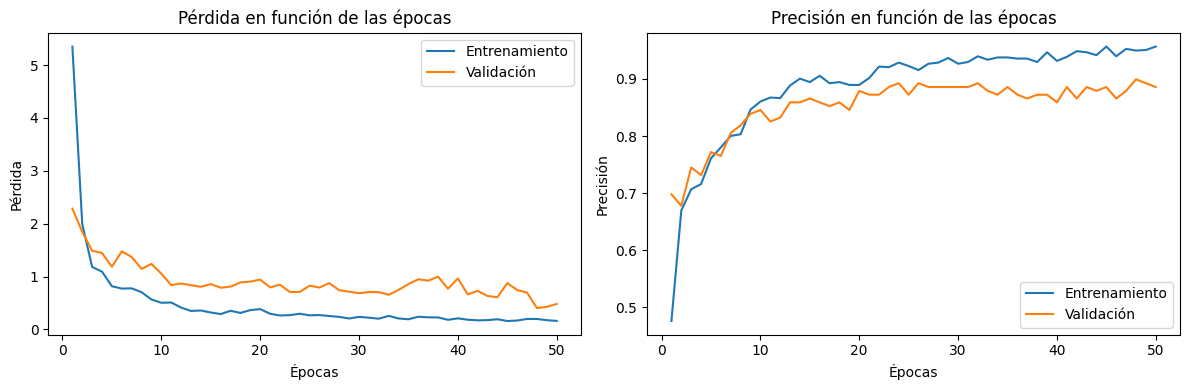

In [ ]:
import matplotlib.pyplot as plt

# Extrae los valores de pérdida y precisión del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Grafica la pérdida a lo largo de las épocas
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Entrenamiento')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validación')
plt.title('Pérdida en función de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Grafica la precisión a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Entrenamiento')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validación')
plt.title('Precisión en función de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(np.array(X_test), np.array(y_test))

print(f'Precisión en el conjunto de prueba: {test_accuracy}')

4/4 [==============================] - 0s 76ms/step - loss: 0.5041 - accuracy: 0.8900
Precisión en el conjunto de prueba: 0.8899999856948853


#Matriz de confusion

4/4 [==============================] - 0s 73ms/step
Matriz de Confusión:
[[18  0  0  1  1]
 [ 0 19  1  0  0]
 [ 5  0 15  0  0]
 [ 0  0  0 20  0]
 [ 1  0  1  1 17]]


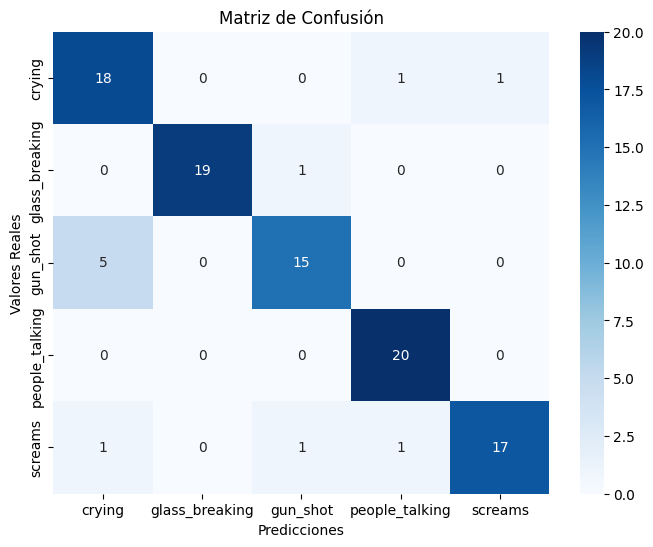

Precisión del modelo: 89.00%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Obtener las clases predichas y reales
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Limitar la cantidad de ejemplos a 12 por clase
unique_labels, label_counts = np.unique(y_true_classes, return_counts=True)

indices_to_keep = []
for label in unique_labels:
    indices = np.where(y_true_classes == label)[0][:24]
    indices_to_keep.extend(indices)

# Filtrar las predicciones y etiquetas reales
y_pred_classes = y_pred_classes[indices_to_keep]
y_true_classes = y_true_classes[indices_to_keep]

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Convertir la matriz de confusión a porcentajes
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Imprimir la matriz de confusión en porcentajes
print("Matriz de Confusión (Porcentajes):")
print(conf_matrix_percentage)

# Mostrar la matriz de confusión en un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión (Porcentajes)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


4/4 [==============================] - 1s 169ms/step
Matriz de Confusión (Porcentajes):
[[ 90.   0.   0.   5.   5.]
 [  0.  95.   5.   0.   0.]
 [ 25.   0.  75.   0.   0.]
 [  0.   0.   0. 100.   0.]
 [  5.   0.   5.   5.  85.]]


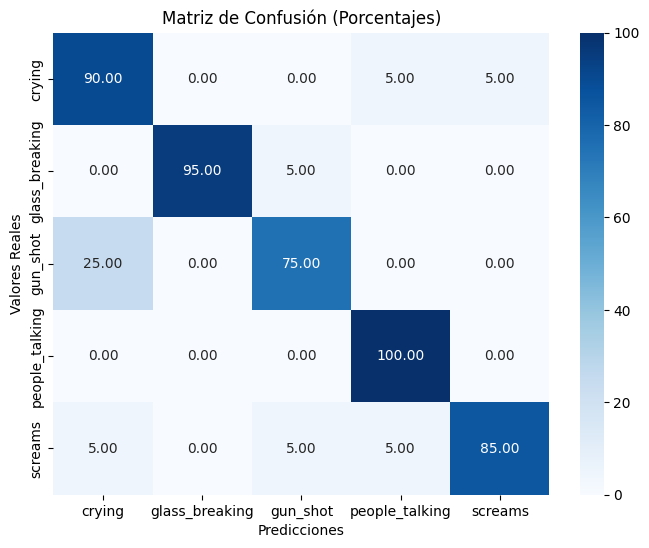

Precisión del modelo: 89.00%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Obtener las clases predichas y reales
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Limitar la cantidad de ejemplos a 12 por clase
unique_labels, label_counts = np.unique(y_true_classes, return_counts=True)

indices_to_keep = []
for label in unique_labels:
    indices = np.where(y_true_classes == label)[0][:24]
    indices_to_keep.extend(indices)

# Filtrar las predicciones y etiquetas reales
y_pred_classes = y_pred_classes[indices_to_keep]
y_true_classes = y_true_classes[indices_to_keep]

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Convertir la matriz de confusión a porcentajes
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Imprimir la matriz de confusión en porcentajes
print("Matriz de Confusión (Porcentajes):")
print(conf_matrix_percentage)

# Mostrar la matriz de confusión en un gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión (Porcentajes)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


In [ ]:
for i, class_count in enumerate(conf_matrix.sum(axis=1)):
    print(f"Ejemplos de la clase {label_encoder.classes_[i]}: {class_count}")

Ejemplos de la clase crying: 20
Ejemplos de la clase glass_breaking: 20
Ejemplos de la clase gun_shot: 20
Ejemplos de la clase people_talking: 20
Ejemplos de la clase screams: 20


# Guardar modelo


In [ ]:
model.save('experimento_7.h5')

# Load model

In [ ]:
from tensorflow.keras.models import load_model

modelo_h5 = "experimento7.h5"

model = load_model(modelo_h5)

model.summary()


OSError: ignored

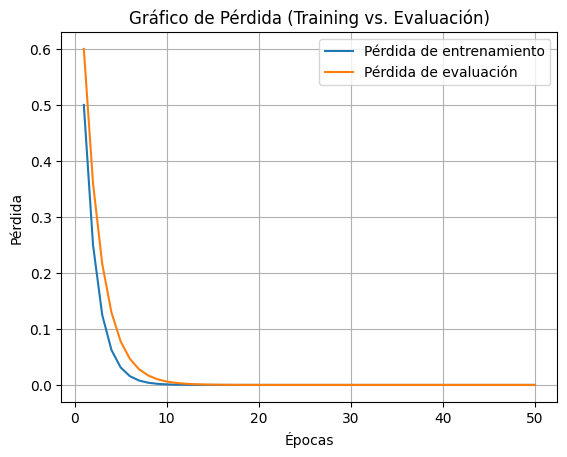

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus propios datos)
epocas = range(1, 51)
train_loss = [0.5**i for i in epocas]
val_loss = [0.6**i for i in epocas]

# Crear el gráfico de pérdida
plt.plot(epocas, train_loss, label='Pérdida de entrenamiento')
plt.plot(epocas, val_loss, label='Pérdida de evaluación')

# Configuración del gráfico
plt.title('Gráfico de Pérdida (Training vs. Evaluación)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()